In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

2024-08-24 20:40:45.246915: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-24 20:40:45.427857: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-24 20:40:45.517418: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-24 20:40:45.542090: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-24 20:40:45.695589: I tensorflow/core/platform/cpu_feature_guar

<function matplotlib.pyplot.show(close=None, block=None)>

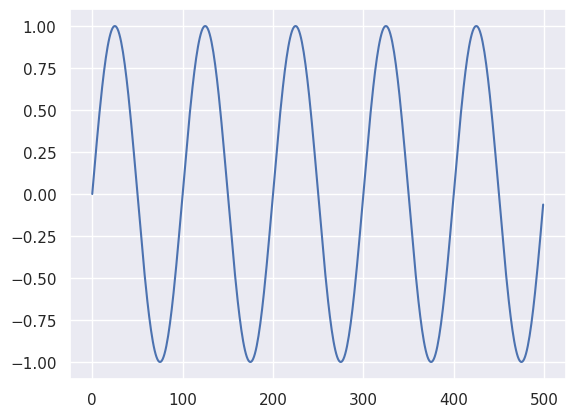

In [2]:
t = np.arange(0,50, 0.1)
x = np.sin(np.pi/5*t)
plt.plot(x)
plt.show

# sine wave signal'x' over time 't'
# this represents the generation of a synthetic signal that might simulate sensor data - distance measurement

<function matplotlib.pyplot.show(close=None, block=None)>

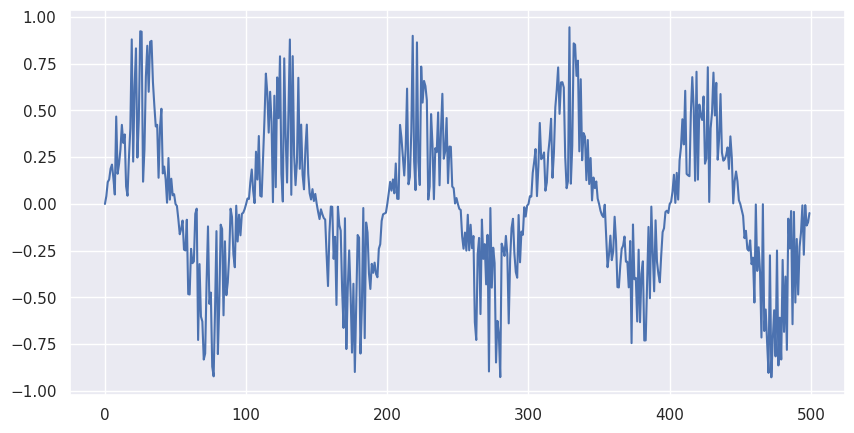

In [3]:
plt.figure(figsize=(10,5))
noise_sin = x * np.random.rand(x.shape[0])
plt.plot(noise_sin)
plt.show

# adds noise to the sine wave signal, sensor data is never perfect it always has some noise

In [4]:
kernel = np.ones((5))/5
kernel

# simple averaging filter - smoothens sensor data - reduces noise 

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [5]:
filter_size = kernel.shape[0]
noise_sin = noise_sin.reshape((-1,1))
print(noise_sin.shape)

def pad(x,padding='same'):
    if padding == 'same':
        pad_h_min = int(np.floor((filter_size - 1)/2))
        pad_h_max = int(np.ceil((filter_size - 1)/2))
        pad_h = (pad_h_min, pad_h_max)
        print(pad_h)
        return np.pad(x, (pad_h, (0, 0)), mode='constant')
    else:
        return x
    
# this pads the noisy signal to ensure that conv ops do not loose any information at the boundaries 
# it ensures that the signal is processed evenly, which is crucial to know when dealing with sensor data- edge info might be important to know 

(500, 1)


In [6]:
noise_sin_pad = pad(noise_sin)
# padding

(2, 2)


In [7]:
kernel = kernel.reshape((-1,1))

In [8]:
output_conv = np.zeros(noise_sin.shape)
filter_size = 5
stride = 1
t_range = int ((noise_sin_pad.shape[0] - filter_size)/ stride +1)
print (t_range) 
for i in range (t_range):
    sum_val = np.sum(noise_sin_pad[i*stride:i*stride + filter_size, :] * kernel)
    output_conv[i,:] = sum_val
    
# manually performs a convolutional operation on the padded signal using the defined kernel 
# to process camera images, detect obstacles and asses the surrounding env 

500


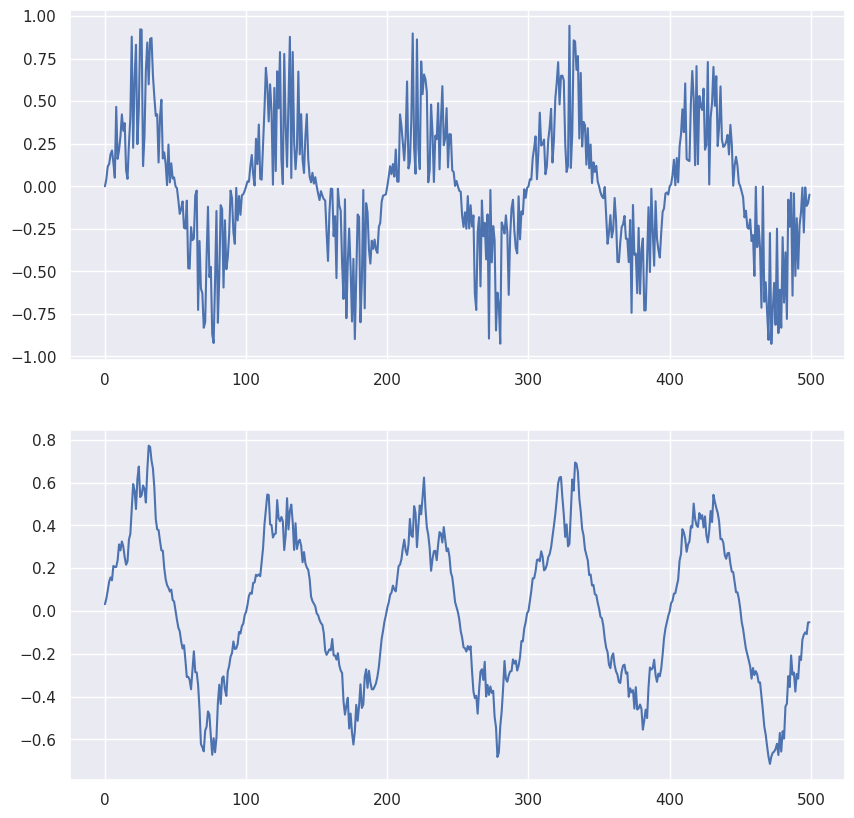

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(noise_sin)
plt.subplot(2,1,2)
plt.plot(output_conv[:,0])
plt.show()

# This plots the noisy signal and the result of the convolution to visualize how the filter has smoothed or processed the signal.

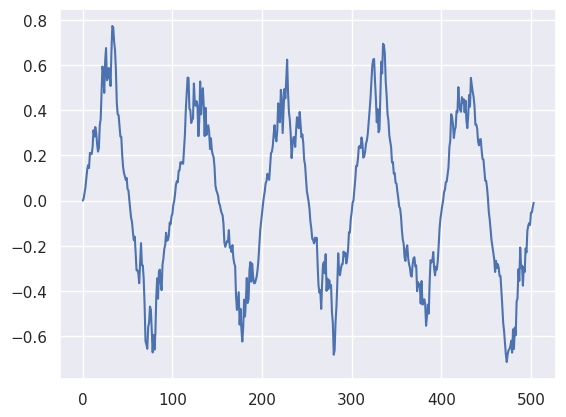

In [10]:
plt.plot(np.convolve(noise_sin_pad[:,0], kernel[:,0],mode='same'))
plt.show()

# performs same funcs as above but more efficiently 